In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
from os import sys
sys.path.append("/content/drive/MyDrive/Deep_Learning/torch_tools/torch_tools/linalg")
sys.path.append("/content/drive/MyDrive/Deep_Learning/torch_tools/")

In [13]:
import vector as vec

NameError: ignored

# Vector Addition for Maximum Magnitude Increase

In [ ]:
"""
Confirm that the vector added to a base
vector that can increase the magnitude of the resultant
vector is always a vector of equal projection magnitudes
"""

'\nConfirm that the vector added to a base\nvector that can increase the magnitude of the resultant\nvector is always a vector of equal projection magnitudes\n'

In [ ]:
import numpy as np

v1 = np.array([3,4])
v2 = np.array([0,1])

vec.vector_sum_magnitude(v1,v2)

5.830951894845301

In [ ]:
scale = 10

degree = np.linspace(0,2*np.pi,1000)
xline = scale*np.sin(degree)
yline = scale*np.cos(degree)

z = np.sum(np.vstack([xline,yline]).T + v1,axis = 1)

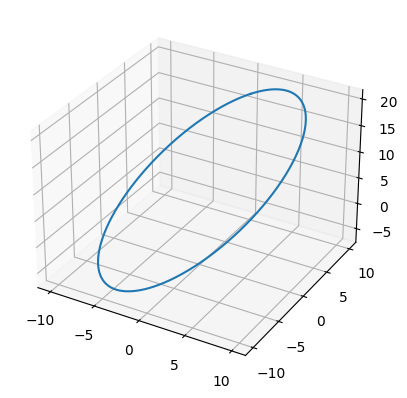

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(xline,yline,z)

In [ ]:
# show this is about when the vectors are equal
idx_max = np.argmax(z)
xline[idx_max],yline[idx_max]

(7.076624788865043, 7.0655064643393235)

# Checking that vectors with same orientation have highest dot product

In [ ]:
v1 = np.array([3,4])

v2a = np.array([1,2])
v2b = np.array([3*np.sqrt(5)/5, 4*np.sqrt(5)/5])

v2a_mag = np.linalg.norm(v2a)
v2b_mag = np.linalg.norm(v2b)

print(f"v2a_mag = {v2a_mag}, v2b_mag = {v2b_mag}")

v2a_mag = 2.23606797749979, v2b_mag = 2.23606797749979


In [ ]:
np.dot(v1,v2a)

11

In [ ]:
np.dot(v1,v2b)

11.180339887498949

In [ ]:
np.linalg.norm(v1)*np.linalg.norm(v2b)

11.180339887498949

# Determining the resultant vector in a high dimensional space from the rotation

In [ ]:
"""
Purpose: Given 2 vectors that define a plane, get the resultant vector that
results from rotating v1 by angle theta in this plane
 (where positive theta in closest direction to v2)
"""

'\nPurpose: Given 2 vectors that define a plane, get the resultant vector that\nresults from rotating v1 by angle theta in this plane\n (where positive theta in closest direction to v2)\n'

In [ ]:
import numpy as np

In [ ]:
# ----------- Iteration 1 --------------
def c1_coeff(v1,v2,theta,c2):
    cos = np.cos(theta)
    v1_mag = np.linalg.norm(v1)

    return cos/v1_mag - np.dot(v1,v2)/(v1_mag**2)*c2

def c2_coeff(v1,v2,theta,):

    cos = np.cos(theta)
    v1_mag = np.linalg.norm(v1)
    v2_mag = np.linalg.norm(v2)
    v1v2 = np.dot(v1,v2)

    quad_coeff = -(v1v2**2)/(v1_mag**2) + v2_mag**2
    lin_coeff = 0
    const_coeff = cos**2 - 1

    roots = [quad_coeff, lin_coeff,const_coeff]
    return np.roots(roots)

def vector_ceoff_from_theta(
    v1,v2,theta):
    c2 = c2_coeff(v1,v2,theta,)
    c1 = c1_coeff(v1,v2,theta,c2)
    return c1,c2

def vector_from_theta(v1,v2,theta, verbose = True):
    c1,c2 = vec.vector_ceoff_from_theta(v1,v2,theta)
    if verbose:
        print(f"c1 = {c1}")
        print(f"c2 = {c2}")
    mat = np.vstack([v1,v2])
    coefficients = np.vstack([c1,c2]).T
    vectors = coefficients@mat
    return vectors

 # ----------- Iteration 2 --------------
def vector_from_theta_intuitive_expression(v1,v2,theta,verbose=True):
    """
    When the second vector is a unit vector,
    the support from v1 will always be cos(theta)
    """
    cos = np.cos(theta)
    v1_mag = np.linalg.norm(v1)
    v2_mag = np.linalg.norm(v2)
    v1v2 = np.dot(v1,v2)

    c1 = np.array([cos/v1_mag,-cos/v1_mag])
    print(f"c1 = {c1}")
    v1_supports = np.vstack([cc*v1 for cc in c1])
    print(f"v1 support magnitudes ({np.cos(theta)}) = \n{[np.linalg.norm(k) for k in v1_supports]}")
    # solving for c2, which defines the v2 support

    # this expression for the error term has to be equal to the sin squared
    quad_coeff = v2_mag**2 + (v1v2)**2 - 2*(v1v2)*v2_mag
    quad_coeff = v2_mag**2 + (v1v2)**2/v1_mag**2 - 2*(v1v2)/v1_mag**2*np.dot(v1,v2)
    const_coeff = cos**2 - 1 #sin squared

    roots =  [quad_coeff,0,const_coeff]
    c2 = np.roots(roots)
    print(f"c2 = {c2}")
    proj = v2 - v1v2/v1_mag*v1

    v2_supports = np.vstack([cc*proj for cc in c2])
    print(f"v2 support magnitudes ({np.sin(theta)})= \n{[np.linalg.norm(k) for k in v2_supports]}")

    vectors = v1_supports + v2_supports

    print(f"Final vector magnitudes")
    for v in vectors:
        print(f"{np.linalg.norm(v)}")

    print(f"{np.dot(proj,)}")
    return



theta = np.pi/6
v1 = np.array([1,2,3,4])
v2 = np.array([0,2,3,4])

v3 = vec.vector_from_theta_projection_simplified(v1,v2,theta)
print(f"v3 = {v3}")
np.abs(vec.theta_from_vectors(v1,v3, verbose=True) - theta ) < 1e-5

v3 = [-1.826557    1.91774615  2.87661922  3.83549229]
theta = 0.5235987755982989


True

# Checking equation for the magnitude of adding two vectors

In [ ]:

c1 = 10
c2 = 5
v1 = np.array([1,2,3,4])
v2 = np.array([0,2,3,4])

v3 = c1*v1 + c2*v2

print(vec.magnitude_from_linear_equation(v1,v2,c1,c2))
print(vec.magnitude(v3))

81.39410298049853
81.39410298049853


# Maximum Orientation Agreement When any subset dimension is as close to scaled orientation of other vector as possible

In [ ]:
import numpy as np

In [ ]:
v1 = np.array([1,5,10])
v2_x = 0
v1_magn = vec.magn(v1)
v1_unit = v1/v1_magn
v1_magn,v1_unit

(11.224972160321824, array([0.08908708, 0.4454354 , 0.89087081]))

(1.0, 1.0)

In [ ]:
"""
Purpose: Act like v2_x is fixed but the rest of v2 is not,
find the vector that has the closest angle to v1 as possible
given the constraints that both are unit vectors
"""
v1 = np.array([0.1,0.9,np.sqrt(0.18)])
v2 = np.array([0.4,0.9,np.sqrt(0.03)])

v2_x = v2[0]
n_samples = 10000
angle = np.linspace(0,np.pi*2,n_samples)

v2_leftover_mag = np.sqrt(1 - v2_x**2)
v2 = np.vstack([
    [v2_x]*n_samples,
    [v2_leftover_mag*np.cos(angle)],
    [v2_leftover_mag*np.sin(angle)],
]).T

dot_prod = v2@v1
max_idx = np.argmax(dot_prod)
v2_ideal = v2[max_idx]

In [ ]:
vec.unit(v2_ideal[1:]),vec.unit(v1[1:])

(array([0.90454057, 0.42638757]), array([0.90453403, 0.42640143]))

In [ ]:
v1 - v2_ideal

array([-0.3       ,  0.07097488,  0.0334734 ])

In [ ]:
# can calculate v2 ideal
v1_remain = v1[1:]

k = v2_leftover_mag/vec.magn(v1_remain)
v2_ideal_theo = k*v1_remain
v2_ideal_theo = np.hstack([[v2_x],v2_ideal_theo])
v2_ideal_theo

# can calculate the remaining disagreement
# (the more or less deviation from ideal, the farther the angles are from each other)
D = [g**2*(1-k) for g in v1_remain]
D, v1_remain**2 - v1_remain*v2_ideal[1:]

([0.063882777915622, 0.014196172870138218], array([0.06387739, 0.01420156]))

In [ ]:
k

0.9211323729436766

In [ ]:
v1**2 - v1*v2_ideal

array([-0.03      ,  0.06387739,  0.01420156])

In [ ]:
vec.magnitude(v2_ideal_theo),v2_leftover_mag

(0.9165151389911681, 0.916515138991168)

In [ ]:
vec.mag(v2_ideal),vec.mag(v2_ideal_theo)

(0.9999999999999999, 0.9165151389911681)

In [ ]:
"""
Conclusion: To maximize the cos of an angle between two vectors,
the remaining elements arranged into a subvector should be scaled versions of another

How to then intuitively predict the dot product:
1) look at how far vector and subvectors are from scaled versions of each other
 --> tries to maintain the relative ratio of element magnitudes
"""

array([0.1])

# Intuition of predicting dot product (from the difference vector)

In [ ]:
import numpy as np
import vector as vec

In [ ]:
print(vec.intuitive_dot_product_computation_from_diff.__doc__)


    You can compute the dot product in a certain way that gives you 
    good intuition about why the number came out that way
    by decoupling the magnitude and orientation in the following manner.

    Process: 
    With vectors v,g and elements vn and gn
    1) Convert both vectors to unit_vector * scale
        c1*vh, c2*gh  where vh,gh are unit vectors
    2) Find the difference of the 2 unit vectors (vh - gh) = D
    3) Square each element in the difference vector
        E = (vhn - ghn)**2
    4) The dot product of vh and gh is just the cosine because they are unit vectors.
    And the dot product can be computed in the following manner

        dot product = 1 - 0.5*sum(En)
        cos(theta)  = 1 - 0.5*sum(En)

    Summary of Process: For each element of the difference vector of the unit vectors,
    if you square and divide by 2,
    that is the amount you subtract from the cosine of the angle between them

    What does this show intuitively?
    - the cosine is maximized 

In [ ]:
vec.example_intuitive_dot_product_computation_from_diff()

d = [-0.02422439 -0.4060065   0.14554473  0.23042928]
e = [0.00058682 0.16484128 0.02118327 0.05309765]
cos(theta) = 0.8801454906185027
intuitive manner dot_product= 121.00000000000001
Using standard dot_product = 121


# Intuition of predicting dot product (from the hadamard product and squares)

In [43]:
import numpy as np
import vector as vec

In [44]:
print(vec.intuitive_dot_product_computation_from_product.__doc__)


    If we want to look at how the hadamard product (elementwise multiplicaiton)
    gives us the same outcome as the intuitive dot product (using the difference vector)
    we just expand our intuitive difference vector equation a little

    given unit vectors vh and gh, dh = vh - gh


    cos = 1 - 0.5*sum(dhi**2)
    cos = 1 - 0.5*sum((vhi - ghi)**2)
    #expanding out the square
    cos = 1 - 0.5 * sum( vhi**2 + ghi**2 - 2*vhi*ghi)
    cos = 1 - sum( [vhi**2 + ghi**2]/2  - vhi*ghi)

    The term [vhi**2 + ghi**2]/2  - vhi*ghi will always be greater than zero
        because it is equal to dhi**2

    --- alternate proof for this step ---
    real numbers a and b, call b = a + c

    a**2 + b**2 - 2*a*b > 0
    a**2 + (a+c)**2 - 2*a*(a + c) > 0
    a**2 + a**2 + c**2 + 2*a*c - 2*a**2 - 2*a*c > 0
    # everything cancels out other than c**2
    c**2 > 0
    -------------------------------------------

    Interpretation: 
    - [vhi**2 + ghi**2]/2  --> average magn squared of all pr

In [45]:
vec.example_intuitive_dot_product_computation_from_product()

cosine_manually = 0.8801454906185027
dot_product_manually = 121.00000000000001
dot_product_numpy = 121


121.00000000000001